In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(15):
    temperature, df = importData("output/temperature_%s.csv" % i)
    data[temperature] = df


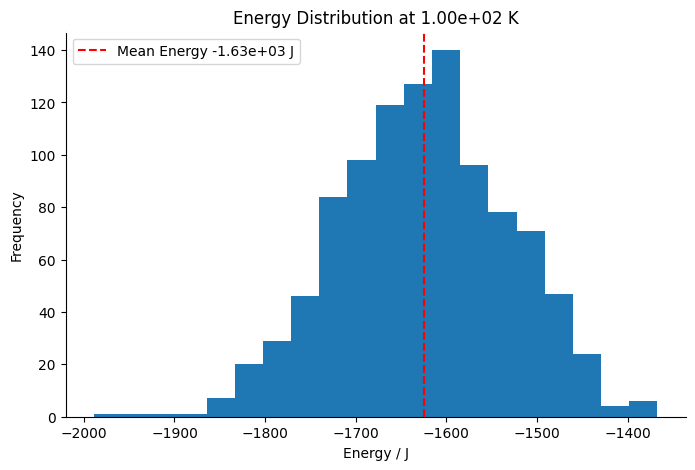

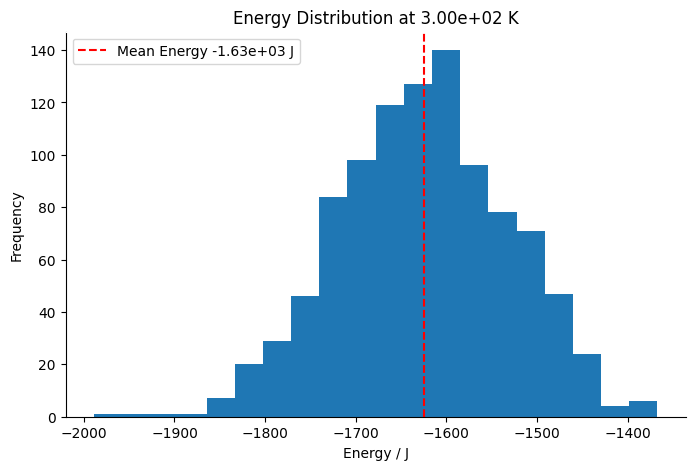

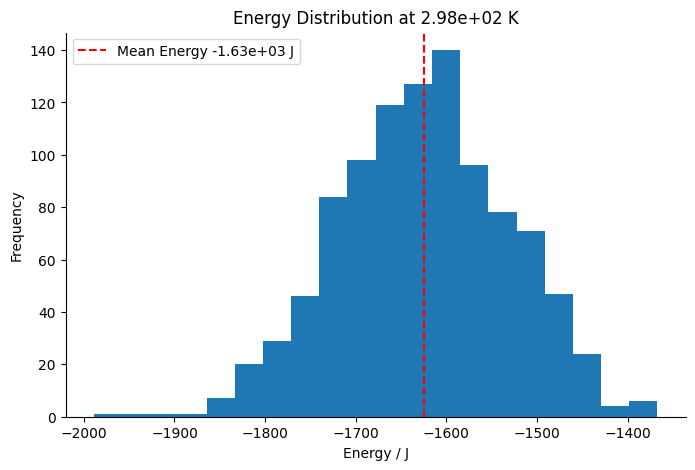

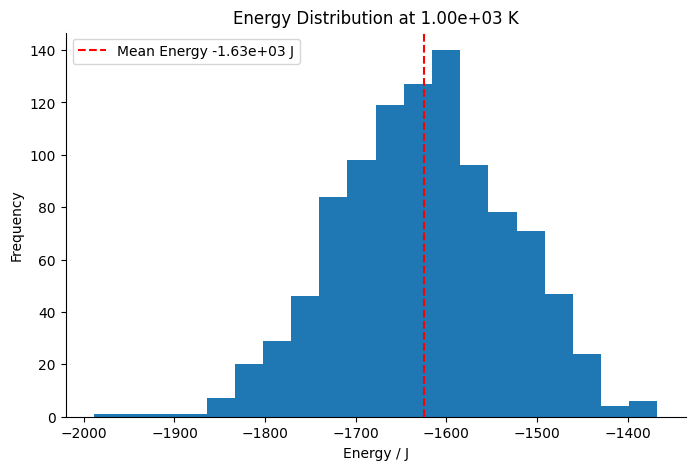

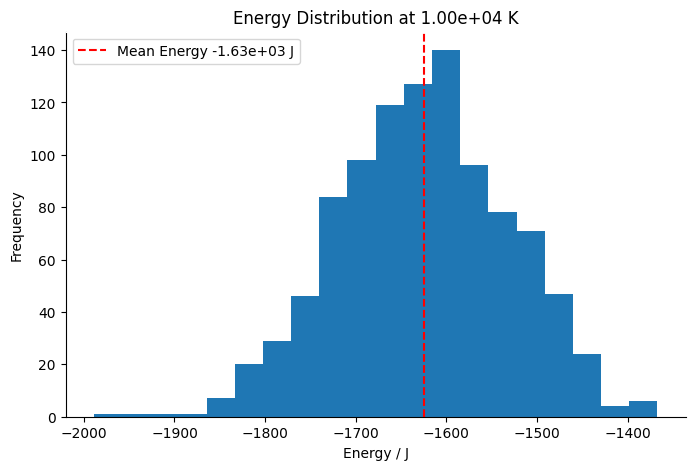

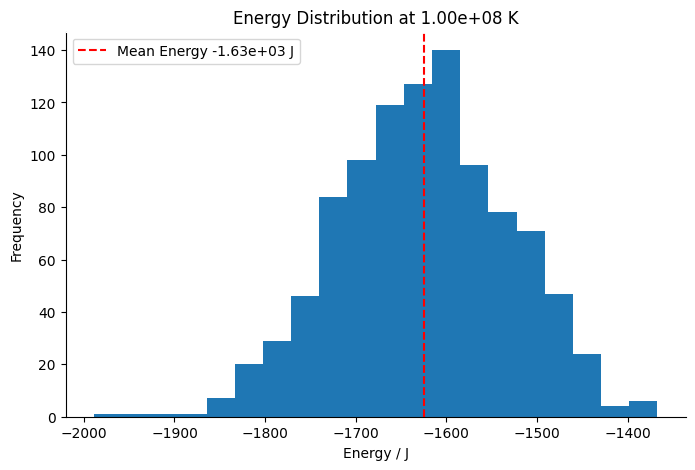

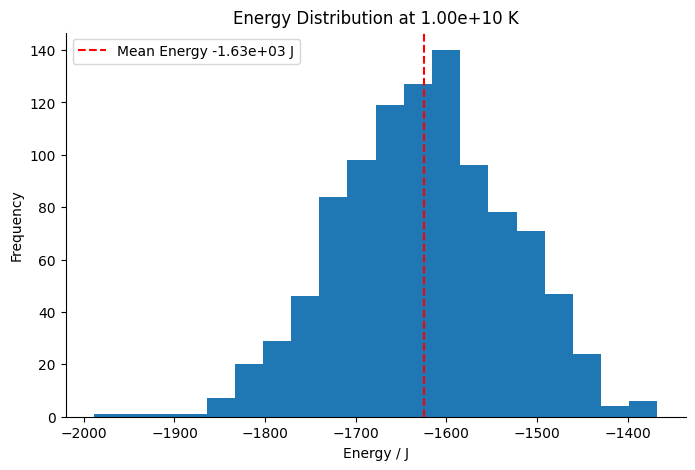

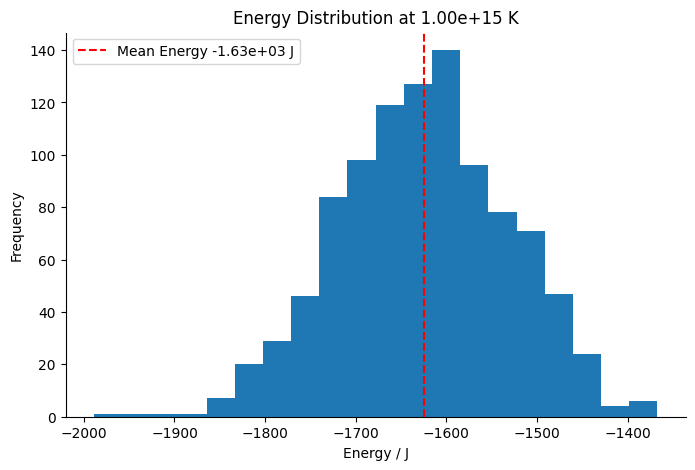

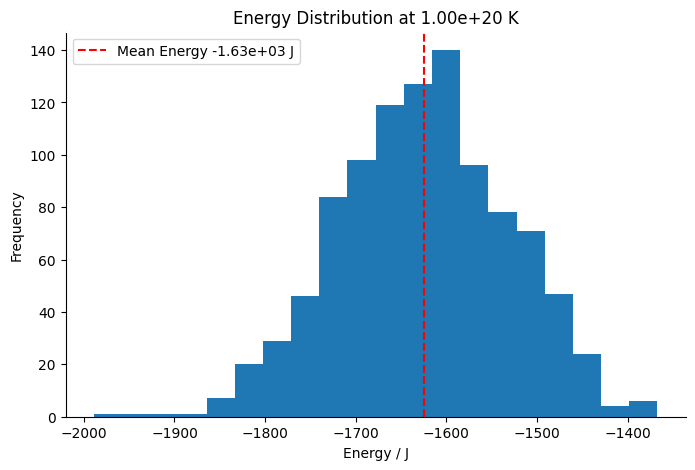

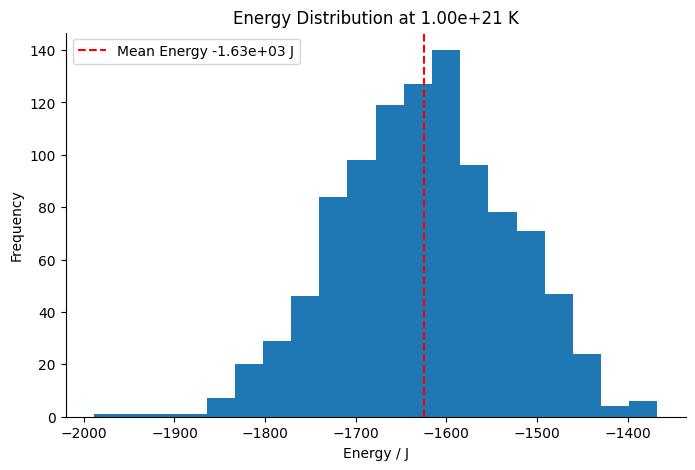

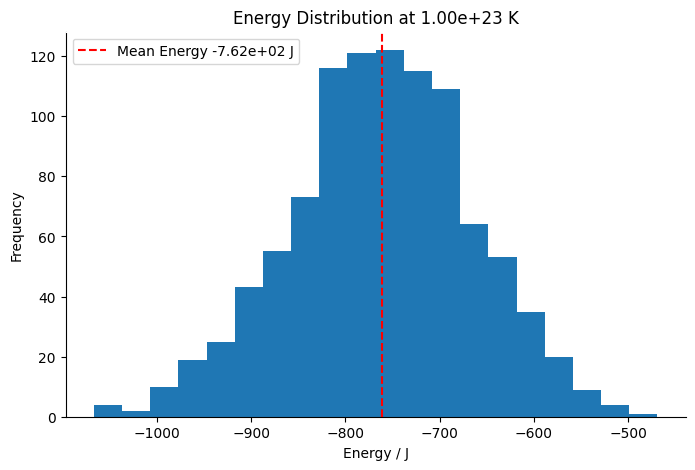

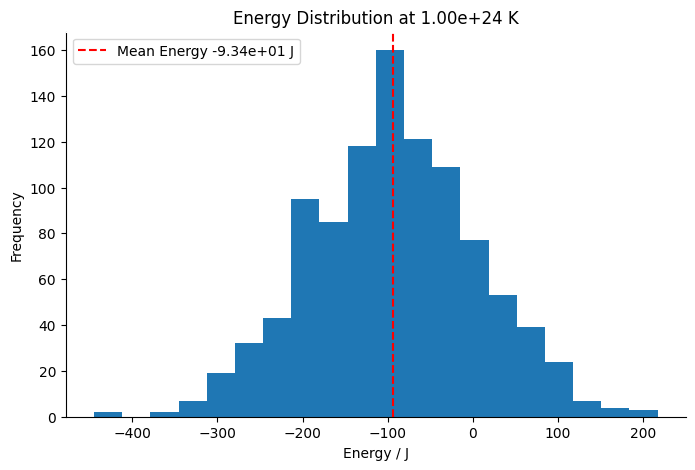

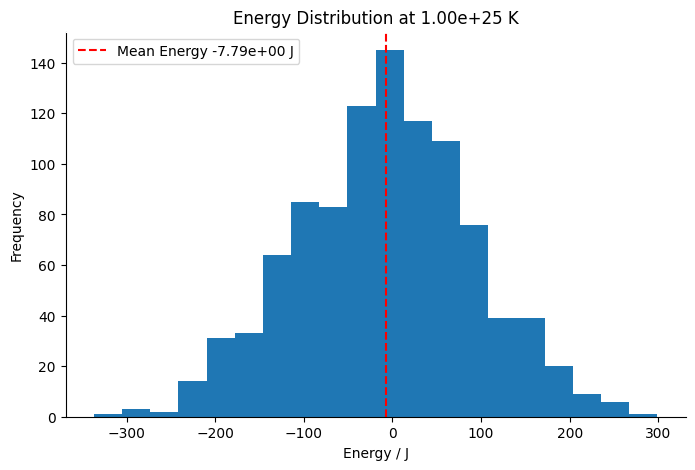

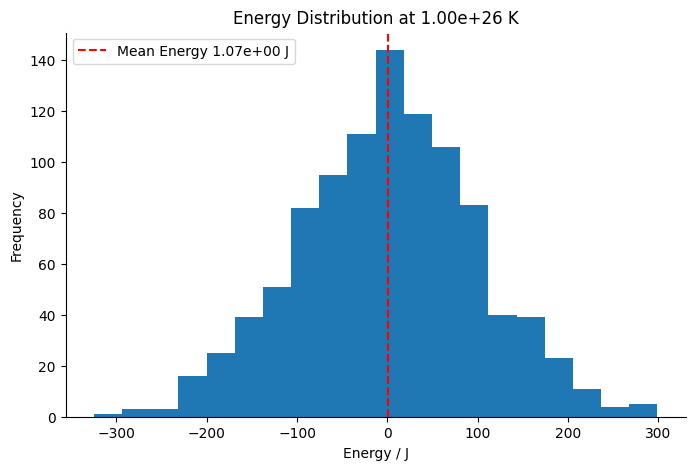

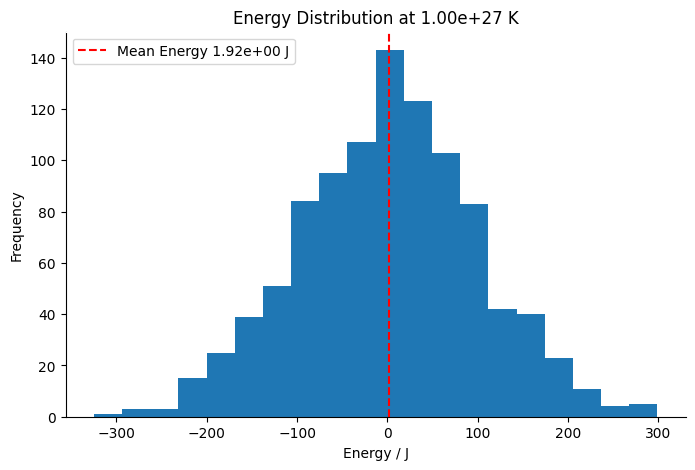

In [11]:
for temperature in data.keys():

    fig, ax = plt.subplots(figsize=(8, 5))
    df = data[temperature]
    ax.hist(df["energy"], bins=20)
    ax.set_title(f"Energy Distribution at %s K" % "{:.2e}".format(temperature))
    # ax.set_xlim(-10e6, 10e6)
    ax.axvline(df["energy"].mean(), color="red", linestyle="dashed", label=f"Mean Energy %s J" % "{:.2e}".format(df["energy"].mean()))
    ax.legend(loc="upper left")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Energy / J")
    ax.spines['top'].set_color('#FFFFFF')
    ax.spines['right'].set_color('#FFFFFF')
    # print(fig.get_size_inches())
    # ax.annotate(f"Mean Energy %s J" % "{:.2e}".format(df["energy"].mean()), (0.01, 0.9), xycoords="axes fraction")
    # print(df["energy"].mean())


[-1623. -1651. -1457. ...   131.    19.   -53.]


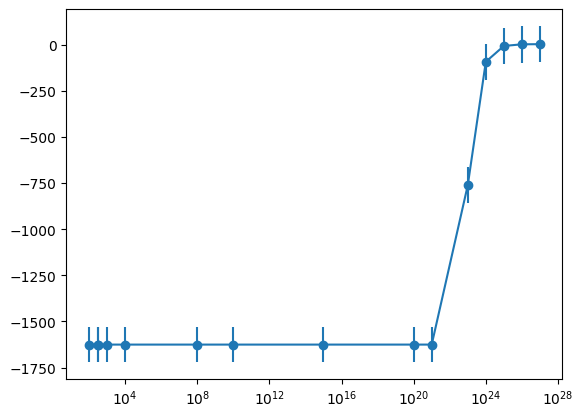

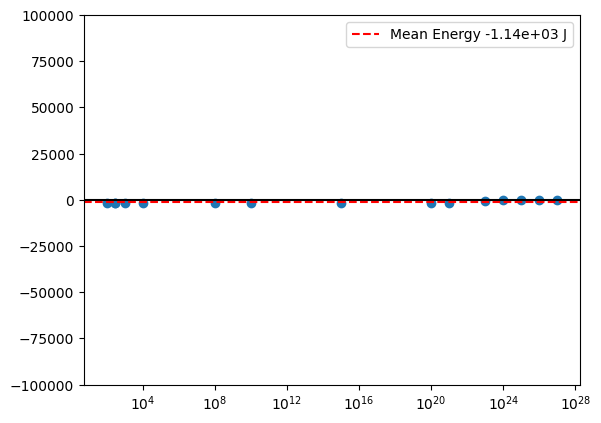

In [12]:

fig, ax = plt.subplots()

fig2, ax2 = plt.subplots()

all_energies = []
mean_energies = []
ranges = []

for temp in data.keys():
    all_energies = np.append(all_energies, data[temp]["energy"])
    mean_energies.append(data[temp]["energy"].mean())
    ranges.append(np.std(data[temp]["energy"]))

ax2.scatter(data.keys(), mean_energies)
ax2.set_xscale("log")
ax2.axhline(0, color="black")
ax2.set_ylim(-100000, 100000)
print(all_energies)
ax2.axhline(np.mean(all_energies), color="red", ls="dashed", label=f"Mean Energy %s J" % "{:.2e}".format(np.mean(all_energies)))
ax2.legend()


ax.errorbar(data.keys(), mean_energies, ranges)

ax.scatter(data.keys(), mean_energies)
ax.set_xscale("log")
